In [1]:
# Load the extension and set it to autoreload all modules.
%load_ext autoreload
%autoreload 2

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [3]:
from general.spectrogram import SpectrogramLoader
from general.keras import Trainer
from pcgita.dataloader import PcGitaDataLoader
from pcgita.preprocessor import PcGitaPreprocessor
from pcgita.model import PcGitaModel

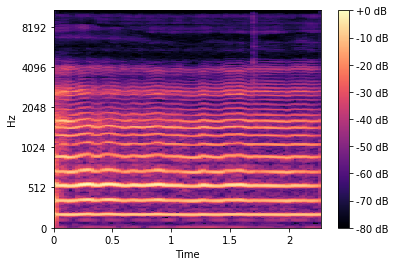

In [4]:
spectrogram_loader = SpectrogramLoader()

S = spectrogram_loader.load_spectrogram('../../k_fold_by_vowels/A/k_0/test/0/0004/AVPEPUDEAC0004a2.wav')
librosa.display.specshow(S, sr=spectrogram_loader.config["sr"], hop_length=spectrogram_loader.config["hop_length"], x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [5]:
from general.keras import prepare_session
prepare_session()

data_loader = PcGitaDataLoader(spectrogram_loader)
preprocessor = PcGitaPreprocessor()
trainer = Trainer(PcGitaModel())

histories = []

for i in range(5):
    di = data_loader.load_fold('A', i)
    
    print('Fold {} loaded!'.format(i))
    #print('Train subjects: {} Test subjects: {}'.format(len(fold.X_train), len(fold.X_val)))
    #print('X_train.shape {}'.format(fold.X_train[0][0].shape))
    
    preprocessor.preprocess(di)

    print('Preprocessing: done!')
    #print('Train subjects: {} Test subjects: {}'.format(len(fold.X_train), len(fold.X_val)))

    #print('X_train.shape {}'.format(fold.X_train.shape))
    
    history = trainer.fit_model(di)
    histories.append(history)
    print('Model fit: done!')

Fold 0 loaded!
Preprocessing: done!
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 144 samples, validate on 30 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
144/144 [==============================] - 13s 92ms/sample - loss: 1.1889 - acc: 0.5139 - val_loss: 1.1890 - val_acc: 0.5000
Epoch 2/100
144/144 [==============================] - 2s 11ms/sample - loss: 0.8836 - acc: 0.5833 - val_loss: 0.8385 - val_acc: 0.5333
Epoch 3/100
144/144 [==============================] - 2s 12ms/sample - loss: 0.6449 - acc: 0.6597 - val_loss: 0.8281 - val_acc: 0.4333
Epoch 4/100
144/144 [==============================] - 1s 7ms/sample - loss: 0.6096 - acc: 0.6319 - val_loss: 0.8760 - val_acc: 0.5000
Epoch 5/100
144/144 [==============================] - 1s 5ms/sample - loss: 0.5713 - acc: 0.7083 - val_loss: 0.8973 - val_acc: 0.5000
Epoch

Epoch 54/100
144/144 [==============================] - 1s 9ms/sample - loss: 0.2990 - acc: 0.8403 - val_loss: 1.7996 - val_acc: 0.6000
Epoch 55/100
144/144 [==============================] - 1s 5ms/sample - loss: 0.3447 - acc: 0.7986 - val_loss: 1.9591 - val_acc: 0.5667
Epoch 56/100
144/144 [==============================] - 1s 6ms/sample - loss: 0.3272 - acc: 0.7778 - val_loss: 1.9951 - val_acc: 0.5667
Epoch 57/100
144/144 [==============================] - 1s 5ms/sample - loss: 0.2948 - acc: 0.8542 - val_loss: 2.0906 - val_acc: 0.5667
Epoch 58/100
144/144 [==============================] - 1s 6ms/sample - loss: 0.3493 - acc: 0.7847 - val_loss: 2.0878 - val_acc: 0.5333
Epoch 59/100
144/144 [==============================] - 1s 7ms/sample - loss: 0.3094 - acc: 0.8125 - val_loss: 2.1189 - val_acc: 0.5333
Epoch 60/100
144/144 [==============================] - 1s 6ms/sample - loss: 0.3107 - acc: 0.8056 - val_loss: 2.3952 - val_acc: 0.5333
Epoch 61/100
144/144 [==========================

144/144 [==============================] - 1s 6ms/sample - loss: 0.2195 - acc: 0.8264 - val_loss: 1.8149 - val_acc: 0.6333
Epoch 74/100
144/144 [==============================] - 1s 7ms/sample - loss: 0.2161 - acc: 0.8611 - val_loss: 1.8390 - val_acc: 0.5667
Epoch 75/100
144/144 [==============================] - 1s 6ms/sample - loss: 0.2197 - acc: 0.8750 - val_loss: 1.5795 - val_acc: 0.5667
Epoch 76/100
144/144 [==============================] - 1s 6ms/sample - loss: 0.1714 - acc: 0.8819 - val_loss: 1.5344 - val_acc: 0.6000
Epoch 77/100
144/144 [==============================] - 1s 5ms/sample - loss: 0.1833 - acc: 0.8750 - val_loss: 1.8687 - val_acc: 0.5667
Epoch 78/100
144/144 [==============================] - 1s 7ms/sample - loss: 0.2287 - acc: 0.8889 - val_loss: 1.6552 - val_acc: 0.5667
Epoch 79/100
144/144 [==============================] - 1s 6ms/sample - loss: 0.1980 - acc: 0.8889 - val_loss: 1.6396 - val_acc: 0.5667
Epoch 80/100
144/144 [==============================] - 1s 6m

141/141 [==============================] - 1s 6ms/sample - loss: 0.2456 - acc: 0.8865 - val_loss: 2.9501 - val_acc: 0.5455
Epoch 93/100
141/141 [==============================] - 1s 6ms/sample - loss: 0.1997 - acc: 0.8865 - val_loss: 3.0683 - val_acc: 0.5152
Epoch 94/100
141/141 [==============================] - 1s 6ms/sample - loss: 0.2045 - acc: 0.8936 - val_loss: 3.0139 - val_acc: 0.5152
Epoch 95/100
141/141 [==============================] - 1s 7ms/sample - loss: 0.1936 - acc: 0.8936 - val_loss: 3.1057 - val_acc: 0.5152
Epoch 96/100
141/141 [==============================] - 2s 11ms/sample - loss: 0.1852 - acc: 0.9220 - val_loss: 3.1458 - val_acc: 0.5152
Epoch 97/100
141/141 [==============================] - 1s 9ms/sample - loss: 0.2629 - acc: 0.8440 - val_loss: 2.9115 - val_acc: 0.5152
Epoch 98/100
141/141 [==============================] - 1s 5ms/sample - loss: 0.1987 - acc: 0.8936 - val_loss: 2.7043 - val_acc: 0.5758
Epoch 99/100
141/141 [==============================] - 1s 5

138/138 [==============================] - 1s 6ms/sample - loss: 0.5978 - acc: 0.5942 - val_loss: 0.6334 - val_acc: 0.5556
Epoch 11/100
138/138 [==============================] - 2s 12ms/sample - loss: 0.5936 - acc: 0.6087 - val_loss: 0.6287 - val_acc: 0.5556
Epoch 12/100
138/138 [==============================] - 1s 9ms/sample - loss: 0.5596 - acc: 0.6232 - val_loss: 0.6257 - val_acc: 0.6111
Epoch 13/100
138/138 [==============================] - 1s 5ms/sample - loss: 0.5482 - acc: 0.6232 - val_loss: 0.6199 - val_acc: 0.6111
Epoch 14/100
138/138 [==============================] - 1s 4ms/sample - loss: 0.5598 - acc: 0.6087 - val_loss: 0.6208 - val_acc: 0.6111
Epoch 15/100
138/138 [==============================] - 1s 5ms/sample - loss: 0.5466 - acc: 0.6304 - val_loss: 0.6174 - val_acc: 0.5833
Epoch 16/100
138/138 [==============================] - 2s 13ms/sample - loss: 0.5028 - acc: 0.6522 - val_loss: 0.6049 - val_acc: 0.5556
Epoch 17/100
138/138 [==============================] - 1s 

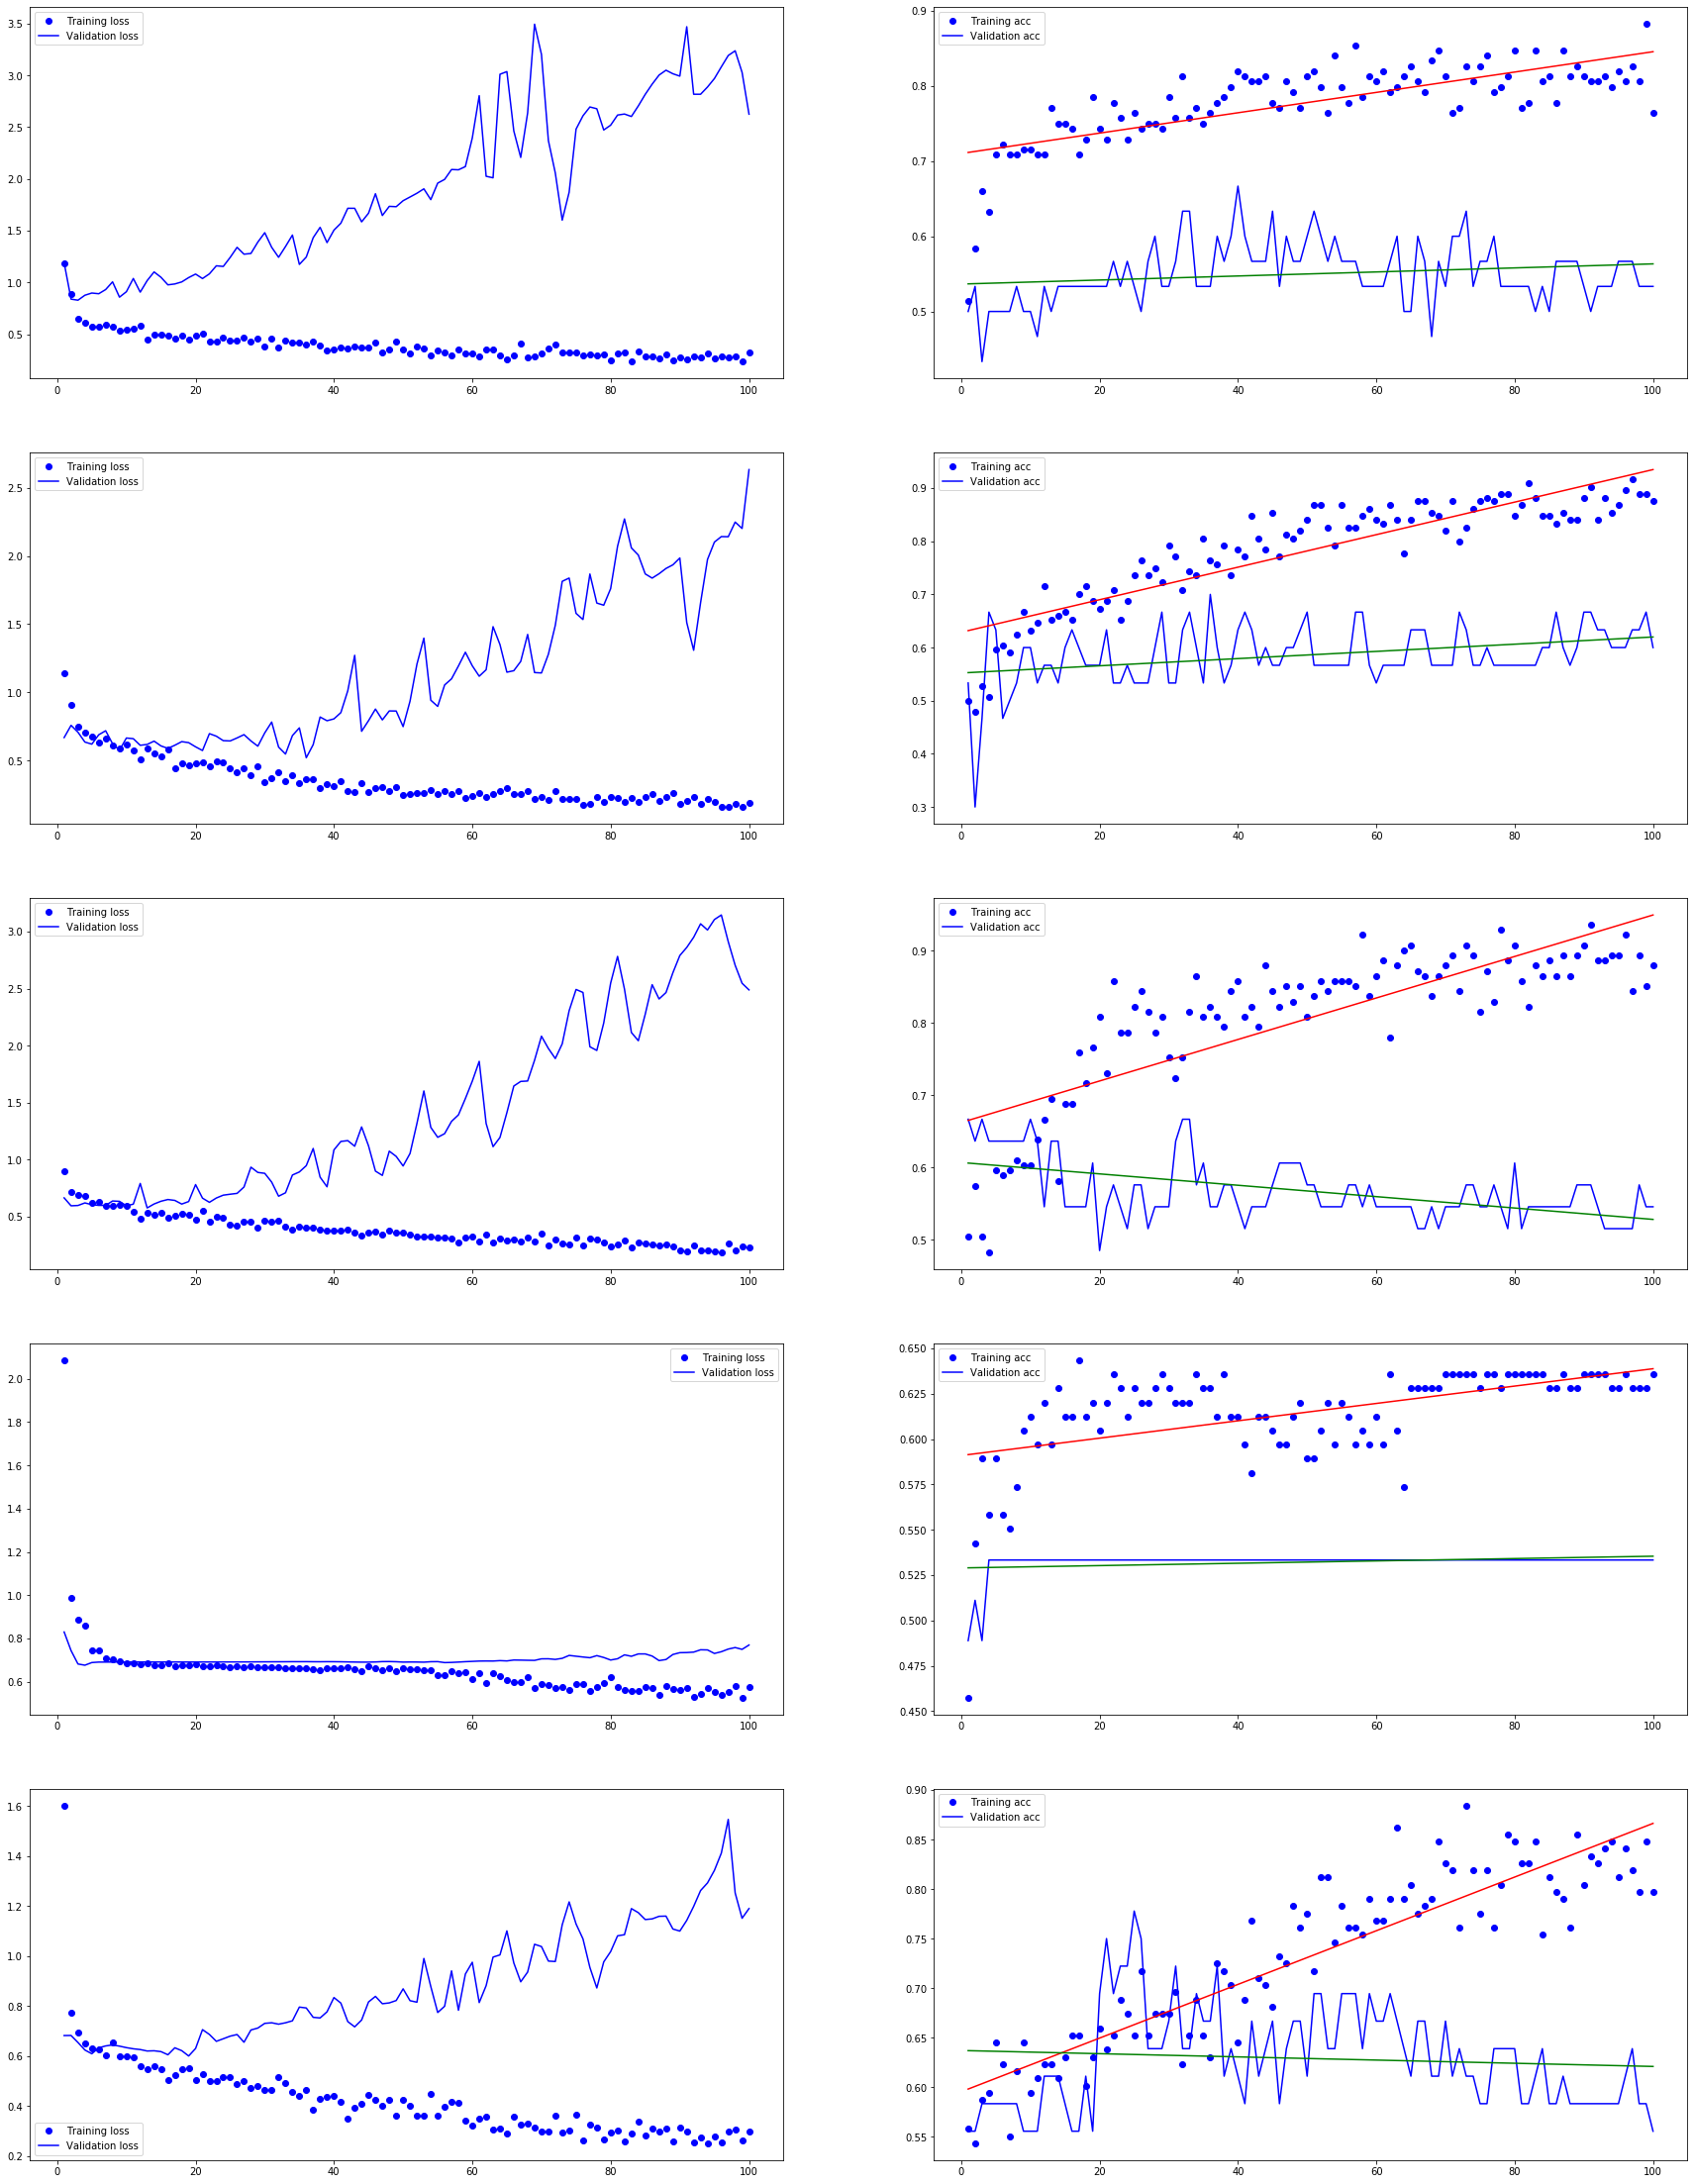

In [6]:
from general.visualization import visualize_history

fig, axs = plt.subplots(nrows=len(histories),ncols=2, figsize=(30, 40))
for i in range(len(histories)):
    visualize_history(fig, axs, i, histories[i])